## Label comparison

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

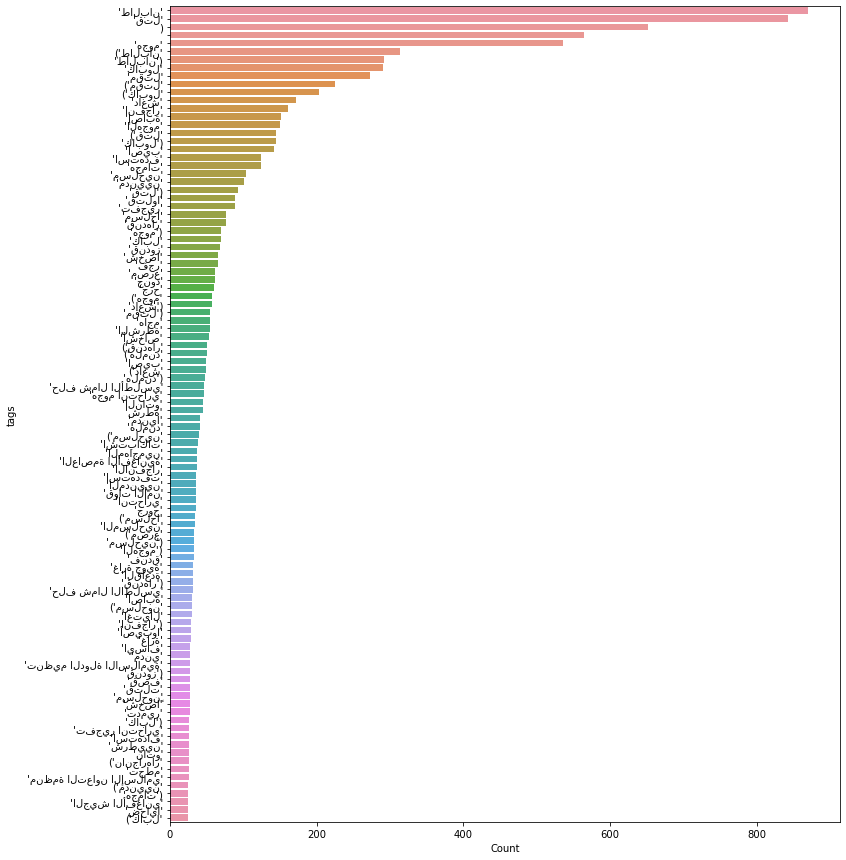

Coder_1 & Coder_2: 0.47977744489621227
Coder_1 & Coder_3: 0.5810102354997086
Coder_2 & Coder_3: 0.3450298311254929
Coder_1 & Coder_2:


C:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                precision    recall  f1-score   support

                                                                     0.79      0.93      0.85       181
                                                   '"خوراسان"'       0.00      0.00      0.00         0
                                                           '.'       0.00      0.00      0.00         0
                                            '، قائد المخابرات'       0.00      0.00      0.00         1
                                                      'آتشين')       0.00      0.00      0.00         1
                                                         'آخر'       0.00      0.00      0.00         1
                                                        'آخر')       0.00      0.00      0.00         0
                                                       'آخران'       0.00      0.00      0.00         1
                                                       'آخرون' 

                                                                precision    recall  f1-score   support

                                                                     0.91      0.74      0.81       212
                                                   '"خوراسان"'       0.00      0.00      0.00         1
                                                           '.'       0.00      0.00      0.00         0
                                            '، قائد المخابرات'       0.00      0.00      0.00         0
                                                      'آتشين')       0.00      0.00      0.00         0
                                                         'آخر'       0.00      0.00      0.00         0
                                                        'آخر')       0.00      0.00      0.00         0
                                                       'آخران'       0.00      0.00      0.00         0
                                                       'آخرون' 

In [2]:

def main():

    coder_1 = pd.read_csv('./pandas/output_ORG.csv', encoding='utf-8')
    cols = ['Sources', 'Actions', 'Targets', 'Districts', 'Provinces']
    coder_1['tags'] = coder_1[cols].apply(lambda x: x.str.strip().str.cat(sep=','), axis=1)
    coder_1 = coder_1.drop(cols, axis=1)
    coder_1['tags'] = coder_1.tags.str.split(",", expand=False)
    #print(coder_1)
    #print (type(coder_1['tags'][1]))
    #print(coder_1)
    #print()
    #print()
    #print()

    coder_2 = pd.read_csv('./pandas/output_AK.csv', encoding='utf-8')
    cols = ['Sources', 'Actions', 'Targets', 'Districts', 'Provinces']
    coder_2['tags'] = coder_2[cols].apply(lambda x: x.str.strip().str.cat(sep=','), axis=1)
    coder_2 = coder_2.drop(cols, axis=1)
    coder_2['tags'] = coder_2.tags.str.split(",", expand=False)
    #print(coder_1)
    #print (type(coder_1['tags'][1]))
    #print(coder_1)
    #print()
    #print()
    #print()

    coder_3 = pd.read_csv('./pandas/output_AAB.csv', encoding='utf-8')
    cols = ['Sources', 'Actions', 'Targets', 'Districts', 'Provinces']
    coder_3['tags'] = coder_3[cols].apply(lambda x: x.str.strip().str.cat(sep=','), axis=1)
    coder_3 = coder_3.drop(cols, axis=1)
    coder_3['tags'] = coder_3.tags.str.split(",", expand=False)
    #print(coder_1)
    #print (type(coder_1['tags'][1]))
    #print(coder_1)
    #print()
    #print()
    #print()
    
    all = coder_1.append(coder_2)
    all = all.append(coder_3)

    list_of_names = all['tags'].to_list()
    
    all_tags = sum(list_of_names, [])
    #print(len(set(all_tags)))

    all_tags = nltk.FreqDist(all_tags)

    #create dataframe
    all_tags_df = pd.DataFrame({'tags': list(all_tags.keys()), 
                              'Count': list(all_tags.values())})
    #print(all_tags_df)
    
    """Below is the bar graph with frequencies for each tag."""

    g = all_tags_df.nlargest(columns="Count", n = 100) 
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=g, x= "Count", y = "tags") 
    ax.set(ylabel = 'tags') 
    plt.show()

        
    #from sklearn.preprocessing import MultiLabelBinarizer

    multilabel_binarizer = MultiLabelBinarizer()
    # Let's train the binarizer on all the possible tags that we identified in a step above.
    multilabel_binarizer.fit(all['tags'])

    # transform target variable
    # Now let's convert the tags for each coder into the binarized encoding.
    c1 = multilabel_binarizer.transform(coder_1['tags'])
    c2 = multilabel_binarizer.transform(coder_2['tags'])
    c3 = multilabel_binarizer.transform(coder_3['tags'])
    #print(len(c1))
    #print(len(c2))
        
        
    """These are the potential labels that we extracted from the all df."""

    #print(multilabel_binarizer.classes_)

    """This is what the labels look like now after encoding them. An array of 1's and 0's."""

    #c1[1]

    """We can always go back to the human encoding by doing the inverse_transform of each. The first article was tagged as the following by coder 1."""

    multilabel_binarizer.inverse_transform(c1)[1]

    """Same for coder2 and coder3"""

    #c2[1]

    multilabel_binarizer.inverse_transform(c2)[1]

    
    #c3[1]

    multilabel_binarizer.inverse_transform(c3)[1]

    # Import Performance metrics
    #from sklearn.metrics import f1_score
    #from sklearn.metrics import classification_report

    print("Coder_1 & Coder_2:",  f1_score(c1, c2, average="micro"))
    print("Coder_1 & Coder_3:",  f1_score(c1, c3, average="micro"))
    print("Coder_2 & Coder_3:",  f1_score(c2, c3, average="micro"))
    
    """Overall, pretty good agreement considering all possible categories. 

    But how are students doing when broken down by category? 
    The classification_report feature from sklearn helps evaluate by potential category. 
    It returns the precision score, recall, and f1 for each. It takes the first coder as the reference and compares the second coder to this first. 

    See this [document](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for an explanation on how each are calculated. 

    Support are the number of articles classified with each of the labels.
    """
    
    print ("Coder_1 & Coder_2:")
    print(classification_report(c1, c2, target_names=multilabel_binarizer.classes_ ))

    print ("Coder_1 & Coder_3:")
    print(classification_report(c1, c3, target_names=multilabel_binarizer.classes_ ))

    print ("Coder_2 & Coder_3:")
    print(classification_report(c2, c3, target_names=multilabel_binarizer.classes_ ))
 
    
    
if __name__ == "__main__":
    main()
